## Elementos finitos linear 1D

## Montar a matrix de massa

In [61]:
ϕ₁(x, a, b)  = (b-x)/(b-a)
ϕ₂(x, a, b)  = (x-a)/(b-a)
dϕ₁(x, a, b)  = 1/(a-b)
dϕ₂(x, a, b)  = 1/(b-a)
mass_matrix(a, b) = [(b-a)/3 (b-a)/6; (b-a)/6 (b-a)/3]
stiff_matrix(a, b)= [1/(b-a) -1/(b-a);-1/(b-a) 1/(b-a) ]

stiff_matrix (generic function with 1 method)

In [62]:
mass_matrix(-1,1)

2x2 Array{Float64,2}:
 0.666667  0.333333
 0.333333  0.666667

In [63]:
stiff_matrix(0,1)

2x2 Array{Float64,2}:
  1.0  -1.0
 -1.0   1.0

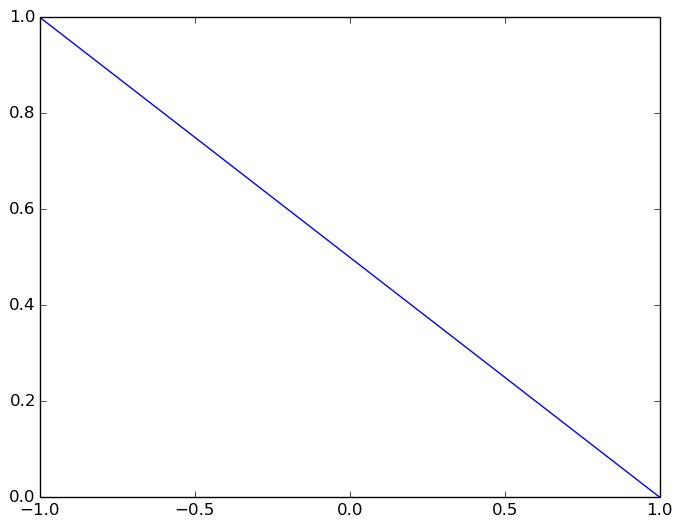

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0c04a3e910>

In [64]:
x = linspace(-1,1,101)
y1=[ϕ₁(x,-1,1) for x in linspace(-1,1,101)]
plot(x,y1)

In [65]:
mass_matrix(-1,1)

2x2 Array{Float64,2}:
 0.666667  0.333333
 0.333333  0.666667

In [66]:
mass_matrix(0,1)

2x2 Array{Float64,2}:
 0.333333  0.166667
 0.166667  0.333333

In [67]:
Nel = 150
a = -1.0
b = 1.0
Ndof = Nel + 1
xn = [linspace(a,b,Nel+1);];


In [68]:
Nel = size(xn,1)-1
dof_map = zeros(Int, 2, Nel)
for i = 1:Nel
    dof_map[1,i] = i
    dof_map[2,i] = i+1
end
dof_map

2x150 Array{Int64,2}:
 1  2  3  4  5  6  7  8   9  10  11  12  …  144  145  146  147  148  149  150
 2  3  4  5  6  7  8  9  10  11  12  13     145  146  147  148  149  150  151

In [69]:
M = zeros(Ndof, Ndof)

for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    for i = 1:2
        ig = dof_map[i,e]
        for k = 1:2
            kg = dof_map[k,e]
            M[kg,ig] += Me[k,i]
        end
    end
end
M

dM = zeros(Ndof, Ndof)

for e = 1:Nel
    dMe = stiff_matrix(xn[e], xn[e+1])
    for i = 1:2
        ig = dof_map[i,e]
        for k = 1:2
            kg = dof_map[k,e]
            dM[kg,ig] += dMe[k,i]
        end
    end
end
dM2 = dM
dM3 = -dM + M
idx = 2:(Ndof-1)
dM = (-dM + M)[idx,idx]
            

149x149 Array{Float64,2}:
 -149.991     75.0022     0.0     …     0.0        0.0        0.0   
   75.0022  -149.991     75.0022        0.0        0.0        0.0   
    0.0       75.0022  -149.991         0.0        0.0        0.0   
    0.0        0.0       75.0022        0.0        0.0        0.0   
    0.0        0.0        0.0           0.0        0.0        0.0   
    0.0        0.0        0.0     …     0.0        0.0        0.0   
    0.0        0.0        0.0           0.0        0.0        0.0   
    0.0        0.0        0.0           0.0        0.0        0.0   
    0.0        0.0        0.0           0.0        0.0        0.0   
    0.0        0.0        0.0           0.0        0.0        0.0   
    0.0        0.0        0.0     …     0.0        0.0        0.0   
    0.0        0.0        0.0           0.0        0.0        0.0   
    0.0        0.0        0.0           0.0        0.0        0.0   
    ⋮                             ⋱                                 
    0.0 

In [70]:
dM2

151x151 Array{Float64,2}:
  75.0  -75.0    0.0    0.0    0.0  …    0.0    0.0    0.0    0.0    0.0
 -75.0  150.0  -75.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0  -75.0  150.0  -75.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0  -75.0  150.0  -75.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0  -75.0  150.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0  -75.0  …    0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0  …    0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   ⋮                     

In [71]:
dM3

151x151 Array{Float64,2}:
 -74.9956    75.0022     0.0        0.0     …     0.0        0.0       0.0   
  75.0022  -149.991     75.0022     0.0           0.0        0.0       0.0   
   0.0       75.0022  -149.991     75.0022        0.0        0.0       0.0   
   0.0        0.0       75.0022  -149.991         0.0        0.0       0.0   
   0.0        0.0        0.0       75.0022        0.0        0.0       0.0   
   0.0        0.0        0.0        0.0     …     0.0        0.0       0.0   
   0.0        0.0        0.0        0.0           0.0        0.0       0.0   
   0.0        0.0        0.0        0.0           0.0        0.0       0.0   
   0.0        0.0        0.0        0.0           0.0        0.0       0.0   
   0.0        0.0        0.0        0.0           0.0        0.0       0.0   
   0.0        0.0        0.0        0.0     …     0.0        0.0       0.0   
   0.0        0.0        0.0        0.0           0.0        0.0       0.0   
   0.0        0.0        0.0        0.

## Montar o lado direito da equação:

In [72]:
#wolfram problem : y'' + y = -4*pi^2*cos(2*pi*x) + cos(2*pi*x),y'(-1) = 0,y'(1)=0
fun(x) = (1.0 - 4*pi^2)*sin(2*pi*x) 
resp(x) = sin(2*pi*x)


resp (generic function with 1 method)

In [73]:
fe = fun(xn)

151-element Array{Float64,1}:
  -9.42449e-15
  -3.21979    
  -6.417      
  -9.56919    
 -12.6543     
 -15.6506     
 -18.5371     
 -21.2936     
 -23.9008     
 -26.3403     
 -28.595      
 -30.6492     
 -32.4884     
   ⋮          
  30.6492     
  28.595      
  26.3403     
  23.9008     
  21.2936     
  18.5371     
  15.6506     
  12.6543     
   9.56919    
   6.417      
   3.21979    
   9.42449e-15

In [74]:
F = zeros(Ndof)
for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    Fe = Me * fun(xn[e:(e+1)])
    for i = 1:2
        ig = dof_map[i,e]
        F[ig] += Fe[i]
    end
end
        
F = F[idx]


149-element Array{Float64,1}:
 -0.0428804
 -0.0854599
 -0.12744  
 -0.168526 
 -0.20843  
 -0.246873 
 -0.283583 
 -0.318305 
 -0.350793 
 -0.380821 
 -0.408178 
 -0.432672 
 -0.454131 
  ⋮        
  0.432672 
  0.408178 
  0.380821 
  0.350793 
  0.318305 
  0.283583 
  0.246873 
  0.20843  
  0.168526 
  0.12744  
  0.0854599
  0.0428804

## Solução do problema

In [75]:
u = dM\F

149-element Array{Float64,1}:
  0.0836276
  0.166669 
  0.248541 
  0.328669 
  0.406493 
  0.481465 
  0.55306  
  0.620775 
  0.684136 
  0.742699 
  0.796052 
  0.843821 
  0.885672 
  ⋮        
 -0.843821 
 -0.796052 
 -0.742699 
 -0.684136 
 -0.620775 
 -0.55306  
 -0.481465 
 -0.406493 
 -0.328669 
 -0.248541 
 -0.166669 
 -0.0836276

In [76]:
u = [0.0; u; 0.0]

151-element Array{Float64,1}:
  0.0      
  0.0836276
  0.166669 
  0.248541 
  0.328669 
  0.406493 
  0.481465 
  0.55306  
  0.620775 
  0.684136 
  0.742699 
  0.796052 
  0.843821 
  ⋮        
 -0.796052 
 -0.742699 
 -0.684136 
 -0.620775 
 -0.55306  
 -0.481465 
 -0.406493 
 -0.328669 
 -0.248541 
 -0.166669 
 -0.0836276
  0.0      

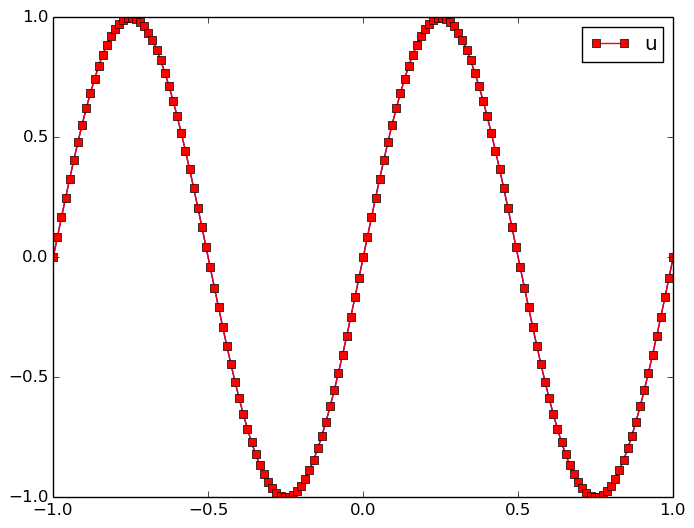

151-element Array{Float64,1}:
  0.0      
  0.0836276
  0.166669 
  0.248541 
  0.328669 
  0.406493 
  0.481465 
  0.55306  
  0.620775 
  0.684136 
  0.742699 
  0.796052 
  0.843821 
  ⋮        
 -0.796052 
 -0.742699 
 -0.684136 
 -0.620775 
 -0.55306  
 -0.481465 
 -0.406493 
 -0.328669 
 -0.248541 
 -0.166669 
 -0.0836276
  0.0      

In [77]:
using PyPlot
xx = linspace(a, b, 201)
plot(xx, resp(xx))
plot(xn, u, "rs-",label = "u")
legend()
u

In [78]:
resp(0.1)

0.5877852522924731

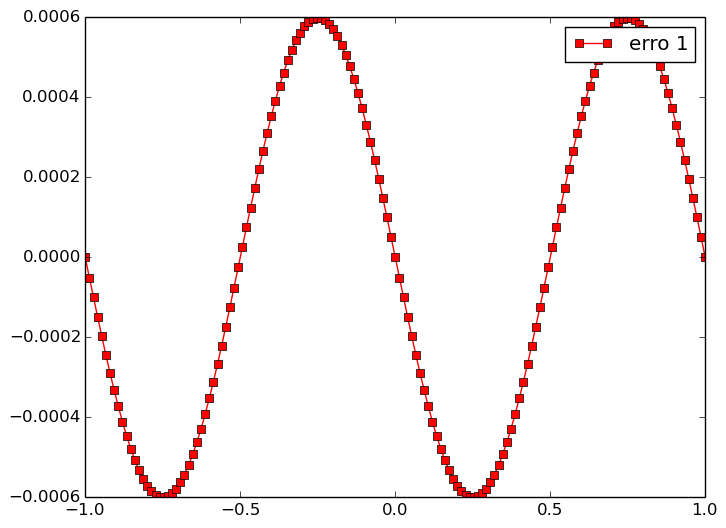

PyObject <matplotlib.legend.Legend object at 0x7f0c0490e090>

In [79]:
e1 = u - resp(xn)
figure()
plot(xn, e1, "rs-",label="erro 1")
legend()